In [1]:
import os
import csv
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import pandas as pd
from fancyimpute import KNN, SoftImpute, IterativeImputer
from sklearn.preprocessing import Imputer

Using TensorFlow backend.


首先进行数据导入，本次为wine的数据处理，将数值属性与标称属性进行分类导入
分析数据选的是winemag-data_first150k.csv，包含10列和150k行葡萄酒评论。

In [2]:
#读入文件
df = pd.read_csv(os.path.dirname(os.getcwd()) + '\winemag-data_first150k.csv', encoding='utf-8')

In [3]:
num_index_list = ['points', 'price']
normal_index_list = ['country', 'description', 'designation',
              'province', 'region_1', 'region_2','variety','winery']

对标称属性的频数进行输出

In [4]:
for index in normal_index_list:
    print(index)
    print(df[index].value_counts())

country
US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12


Williams Selyem                  374
Testarossa                       274
DFJ Vinhos                       258
Chateau Ste. Michelle            225
Columbia Crest                   217
Concha y Toro                    216
Kendall-Jackson                  216
Trapiche                         205
Bouchard Père & Fils             203
Kenwood                          191
De Loach                         189
Joseph Drouhin                   189
Georges Duboeuf                  188
Cameron Hughes                   172
Wines & Winemakers               169
Albert Bichot                    167
Robert Mondavi                   166
Louis Latour                     154
Morgan                           153
D'Arenberg                       153
Dry Creek Vineyard               153
Concannon                        151
Martin Ray                       149
Errazuriz                        148
Gary Farrell                     144
L'Ecole No. 41                   144
Olivier Leflaive                 143
W

数值属性部分的处理
1、进行数值的数据摘要分析
分别对数值属性的均值、最大值、最小值、中位数、四分位点、缺失值进行统计

In [5]:
#分别对数值属性的均值、最大值、最小值、中位数、四分位点、缺失值进行统计
for index in num_index_list:
    print(index, ' mean: ', df[index].mean())
    print(index, ' max: ', df[index].max())
    print(index, ' min: ', df[index].min())
    print(index, ' median: ', df[index].median())
    print(index, ' four percentile: ', df[index].quantile(.25))
    print(index, ' null: ', df[index].isnull().sum())

points  mean:  87.8884184721394
points  max:  100
points  min:  80
points  median:  88.0
points  four percentile:  86.0
points  null:  0
price  mean:  33.13148249353299
price  max:  2300.0
price  min:  4.0
price  median:  24.0
price  four percentile:  16.0
price  null:  13695


In [6]:
print(df['price'].max())

2300.0


进行画图功能代码编写

In [7]:
#数值属性直方图
def hist_plot(df, type_name):
    for index in num_index_list:
        df[index].hist(edgecolor='black')
        my_x_ticks = np.arange(df[index].min(), df[index].max(), (df[index].max() - df[index].min() + 10) // 10)
        plt.xticks(my_x_ticks)
        plt.title(index + " / " + type_name)
        plt.show()
        print(df[index].value_counts())

In [8]:
#数值属性qq图
def qq_plot(df, type_name):
    for index in num_index_list:
        stats.probplot(df[index], dist="norm", plot = plt)
        plt.title(index + " / " + type_name)
        plt.show()

In [9]:
#数值属性盒图
def box_plot(df, type_name):
    for index in num_index_list:
        plt.title(index + " / " + type_name)
        df[index].plot.box()
        plt.show()

对原数据不做改变，直接画直方图、qq图、盒图的结果

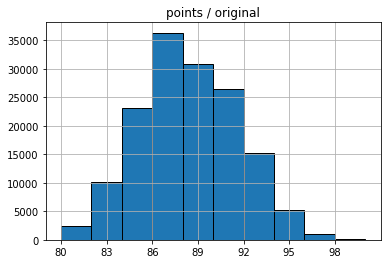

87     20747
88     17871
90     15973
86     15573
89     12921
85     12411
84     10708
91     10536
92      9241
83      6048
93      6017
82      4041
94      3462
95      1716
81      1502
80       898
96       695
97       365
98       131
99        50
100       24
Name: points, dtype: int64


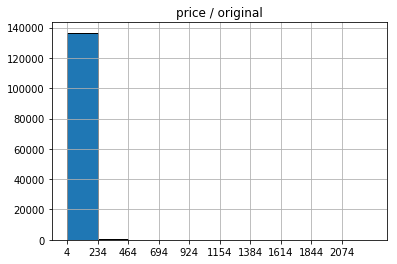

20.0      7860
15.0      7056
18.0      5988
25.0      5955
30.0      5449
10.0      5255
12.0      4950
13.0      4479
16.0      4273
35.0      4194
40.0      4018
14.0      3879
22.0      3723
17.0      3513
24.0      3443
50.0      3415
28.0      3352
19.0      3288
45.0      3243
11.0      3114
9.0       2350
32.0      2197
60.0      2179
23.0      1785
55.0      1785
38.0      1780
26.0      1766
8.0       1633
75.0      1510
36.0      1480
          ... 
530.0        1
848.0        1
1300.0       1
574.0        1
455.0        1
178.0        1
426.0        1
612.0        1
900.0        1
196.0        1
685.0        1
1900.0       1
226.0        1
428.0        1
282.0        1
151.0        1
2300.0       1
172.0        1
268.0        1
510.0        1
415.0        1
271.0        1
335.0        1
398.0        1
319.0        1
740.0        1
545.0        1
351.0        1
698.0        1
588.0        1
Name: price, Length: 357, dtype: int64


In [10]:
hist_plot(df, "original")

points值分布较为平均,price在4~234分布的较多，其余高价分布较少

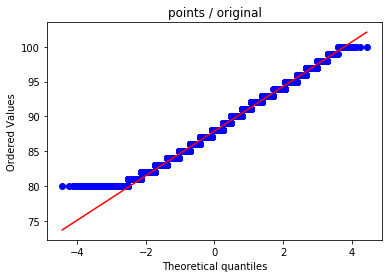

d:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
d:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
d:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


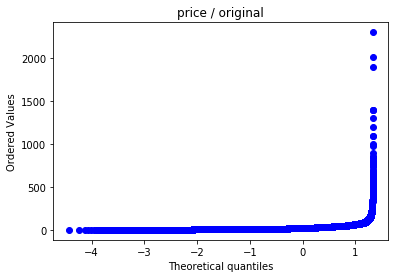

In [11]:
qq_plot(df, "original")

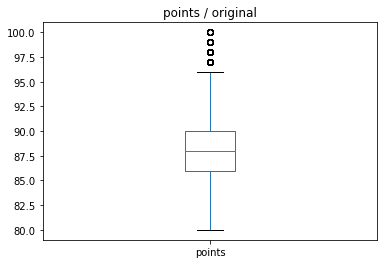

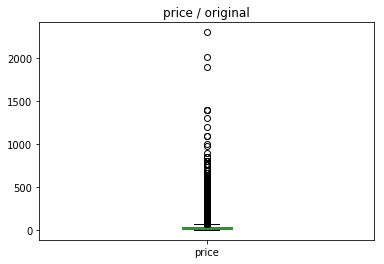

In [12]:
box_plot(df, "original")

对原数据缺失值进行剔除后画图结果

In [13]:
#数值属性(将缺失部分剔除)
df_delete = df.dropna(inplace=False)

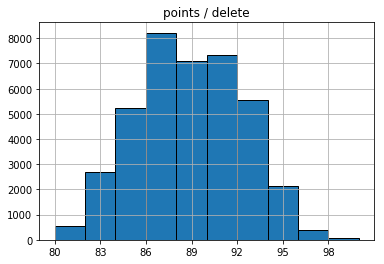

87     4917
90     4362
88     4141
86     3305
92     3269
89     2969
91     2968
85     2681
84     2550
93     2278
83     1462
94     1434
82     1211
95      704
81      326
96      267
80      214
97      124
98       38
99       13
100       8
Name: points, dtype: int64


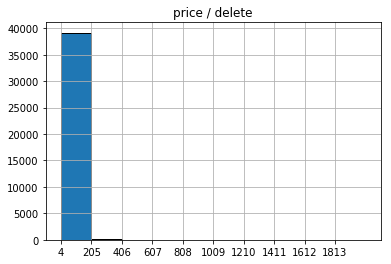

30.0      2027
25.0      1952
20.0      1951
35.0      1864
40.0      1797
45.0      1666
50.0      1592
18.0      1475
28.0      1417
24.0      1155
22.0      1115
15.0      1114
32.0      1044
60.0       942
38.0       925
42.0       831
55.0       824
48.0       792
16.0       774
75.0       737
36.0       730
14.0       602
65.0       590
12.0       569
10.0       559
13.0       549
26.0       539
19.0       538
34.0       470
17.0       465
          ... 
170.0        2
106.0        2
81.0         2
93.0         2
111.0        2
119.0        2
290.0        2
4.0          2
96.0         2
625.0        2
190.0        2
107.0        2
87.0         1
147.0        1
77.0         1
109.0        1
189.0        1
2013.0       1
168.0        1
126.0        1
180.0        1
179.0        1
118.0        1
102.0        1
101.0        1
160.0        1
325.0        1
230.0        1
260.0        1
108.0        1
Name: price, Length: 146, dtype: int64


In [14]:
hist_plot(df_delete, "delete")

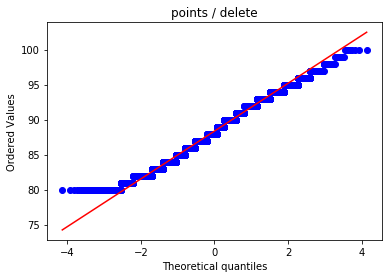

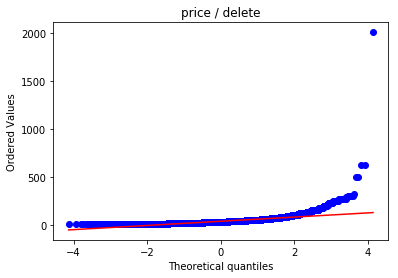

In [15]:
qq_plot(df_delete, "delete")

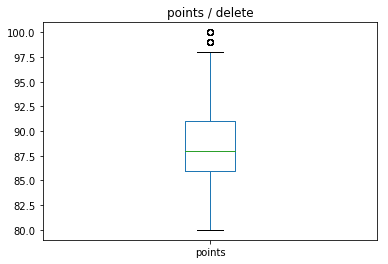

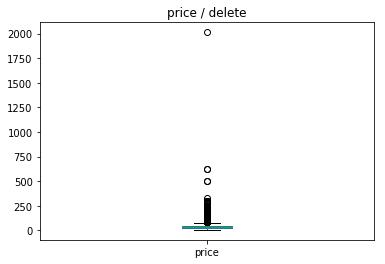

In [16]:
box_plot(df_delete, "delete")

数值属性(用最高频率值来填补缺失值)，画图结果

In [17]:
#数值属性(用最高频率值来填补缺失值)
df_argmax = df.copy()
for index in num_index_list:
    df_argmax[index] = df_argmax[index].fillna(df_argmax[index].mode()[0])

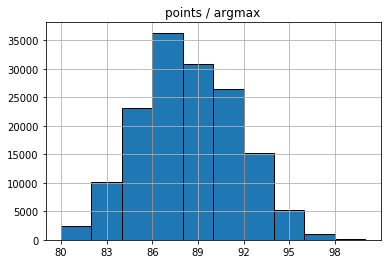

87     20747
88     17871
90     15973
86     15573
89     12921
85     12411
84     10708
91     10536
92      9241
83      6048
93      6017
82      4041
94      3462
95      1716
81      1502
80       898
96       695
97       365
98       131
99        50
100       24
Name: points, dtype: int64


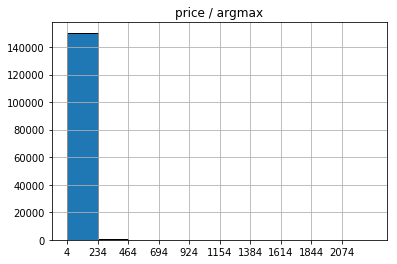

20.0      21555
15.0       7056
18.0       5988
25.0       5955
30.0       5449
10.0       5255
12.0       4950
13.0       4479
16.0       4273
35.0       4194
40.0       4018
14.0       3879
22.0       3723
17.0       3513
24.0       3443
50.0       3415
28.0       3352
19.0       3288
45.0       3243
11.0       3114
9.0        2350
32.0       2197
60.0       2179
23.0       1785
55.0       1785
38.0       1780
26.0       1766
8.0        1633
75.0       1510
36.0       1480
          ...  
530.0         1
848.0         1
1300.0        1
574.0         1
455.0         1
178.0         1
426.0         1
612.0         1
900.0         1
196.0         1
685.0         1
1900.0        1
226.0         1
428.0         1
282.0         1
151.0         1
2300.0        1
172.0         1
268.0         1
510.0         1
415.0         1
271.0         1
335.0         1
398.0         1
319.0         1
740.0         1
545.0         1
351.0         1
698.0         1
588.0         1
Name: price, Length: 357

In [18]:
hist_plot(df_argmax, "argmax")

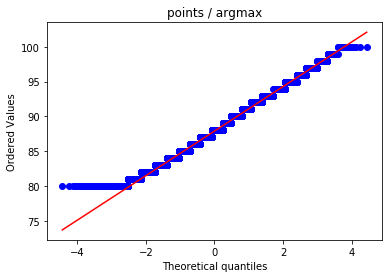

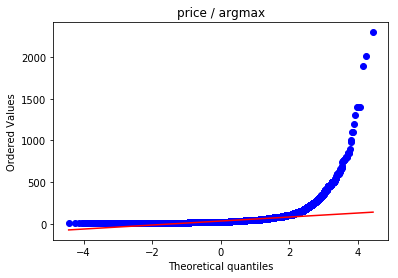

In [19]:
qq_plot(df_argmax, "argmax")

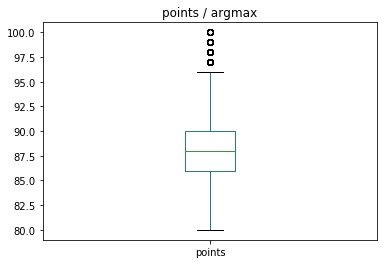

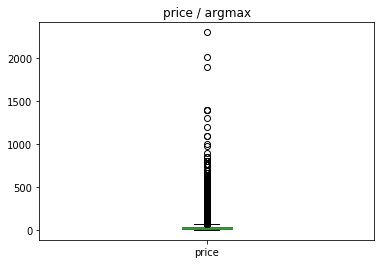

In [20]:
box_plot(df_argmax, "argmax")

通过属性的相关关系来填补缺失值，画图结果

In [21]:
#数值属性(通过属性的相关关系来填补缺失值)
df_relation = df[num_index_list]
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(df_relation)
df_relation = imp.transform(df_relation)
# df_relation = IterativeImputer().fit_transform(df_relation)
df_relation = pd.DataFrame(df_relation, columns = num_index_list)

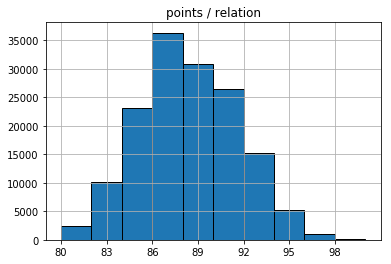

87.0     20747
88.0     17871
90.0     15973
86.0     15573
89.0     12921
85.0     12411
84.0     10708
91.0     10536
92.0      9241
83.0      6048
93.0      6017
82.0      4041
94.0      3462
95.0      1716
81.0      1502
80.0       898
96.0       695
97.0       365
98.0       131
99.0        50
100.0       24
Name: points, dtype: int64


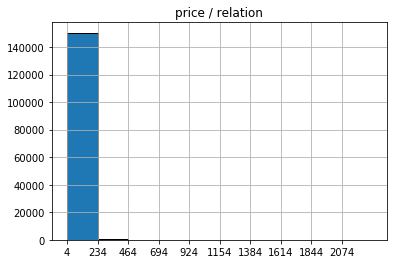

33.131482      13695
20.000000       7860
15.000000       7056
18.000000       5988
25.000000       5955
30.000000       5449
10.000000       5255
12.000000       4950
13.000000       4479
16.000000       4273
35.000000       4194
40.000000       4018
14.000000       3879
22.000000       3723
17.000000       3513
24.000000       3443
50.000000       3415
28.000000       3352
19.000000       3288
45.000000       3243
11.000000       3114
9.000000        2350
32.000000       2197
60.000000       2179
23.000000       1785
55.000000       1785
38.000000       1780
26.000000       1766
8.000000        1633
75.000000       1510
               ...  
530.000000         1
848.000000         1
1300.000000        1
574.000000         1
455.000000         1
178.000000         1
426.000000         1
612.000000         1
900.000000         1
196.000000         1
685.000000         1
1900.000000        1
226.000000         1
428.000000         1
282.000000         1
151.000000         1
2300.000000  

In [22]:
hist_plot(df_relation, "relation")

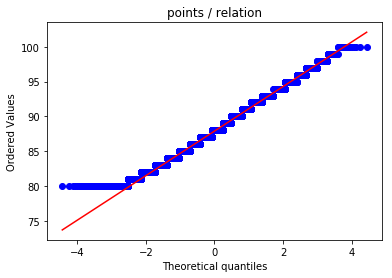

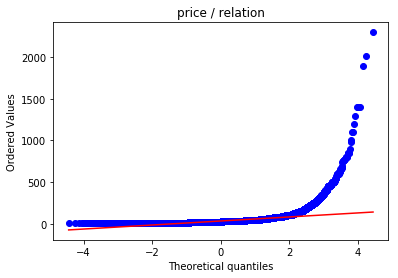

In [23]:
qq_plot(df_relation, "relation")

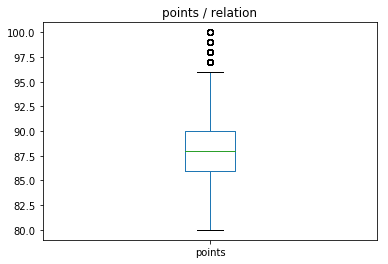

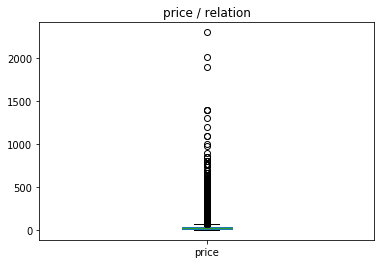

In [24]:
box_plot(df_relation, "relation")

通过数据对象之间的相似性来填补缺失值，画图结果

In [25]:
#数值属性(通过数据对象之间的相似性来填补缺失值)
df_similarity = df.copy()[num_index_list]
# df_similarity = KNN(k=1).fit_transform(df_similarity)
df_similarity = SoftImpute().fit_transform(df_similarity)
df_similarity = pd.DataFrame(df_similarity, columns = num_index_list)

[SoftImpute] Max Singular Value of X_init = 36503.996180
[SoftImpute] Iter 1: observed MAE=1.387298 rank=2
[SoftImpute] Iter 2: observed MAE=1.387917 rank=2
[SoftImpute] Iter 3: observed MAE=1.388483 rank=2
[SoftImpute] Iter 4: observed MAE=1.389017 rank=2
[SoftImpute] Iter 5: observed MAE=1.389504 rank=2
[SoftImpute] Iter 6: observed MAE=1.389947 rank=2
[SoftImpute] Iter 7: observed MAE=1.390367 rank=2
[SoftImpute] Iter 8: observed MAE=1.390752 rank=2
[SoftImpute] Iter 9: observed MAE=1.391101 rank=2
[SoftImpute] Iter 10: observed MAE=1.391420 rank=2
[SoftImpute] Iter 11: observed MAE=1.391719 rank=2
[SoftImpute] Iter 12: observed MAE=1.391993 rank=2
[SoftImpute] Iter 13: observed MAE=1.392241 rank=2
[SoftImpute] Iter 14: observed MAE=1.392467 rank=2
[SoftImpute] Iter 15: observed MAE=1.392673 rank=2
[SoftImpute] Iter 16: observed MAE=1.392865 rank=2
[SoftImpute] Iter 17: observed MAE=1.393041 rank=2
[SoftImpute] Iter 18: observed MAE=1.393202 rank=2
[SoftImpute] Iter 19: observed MAE

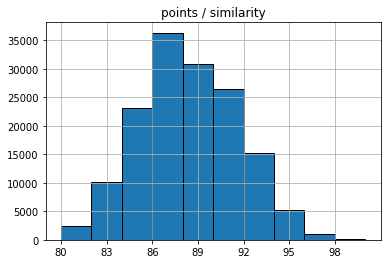

87.0     20747
88.0     17871
90.0     15973
86.0     15573
89.0     12921
85.0     12411
84.0     10708
91.0     10536
92.0      9241
83.0      6048
93.0      6017
82.0      4041
94.0      3462
95.0      1716
81.0      1502
80.0       898
96.0       695
97.0       365
98.0       131
99.0        50
100.0       24
Name: points, dtype: int64


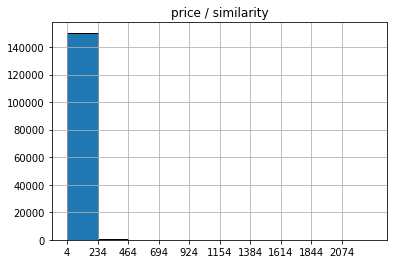

20.000000      7860
15.000000      7056
18.000000      5988
25.000000      5955
30.000000      5449
10.000000      5255
12.000000      4950
13.000000      4479
16.000000      4273
35.000000      4194
40.000000      4018
14.000000      3879
22.000000      3723
17.000000      3513
24.000000      3443
50.000000      3415
28.000000      3352
19.000000      3288
45.000000      3243
11.000000      3114
9.000000       2350
32.000000      2197
60.000000      2179
23.207299      1837
55.000000      1785
23.000000      1785
38.000000      1780
26.000000      1766
22.943580      1722
8.000000       1633
               ... 
848.000000        1
455.000000        1
351.000000        1
486.000000        1
178.000000        1
612.000000        1
426.000000        1
574.000000        1
196.000000        1
900.000000        1
323.000000        1
193.000000        1
685.000000        1
588.000000        1
258.000000        1
317.000000        1
451.000000        1
698.000000        1
268.000000        1


In [26]:
hist_plot(df_similarity, "similarity")

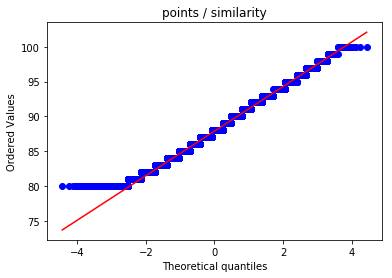

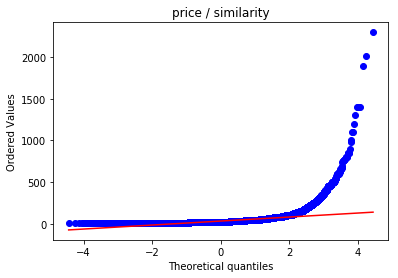

In [27]:
qq_plot(df_similarity, "similarity")

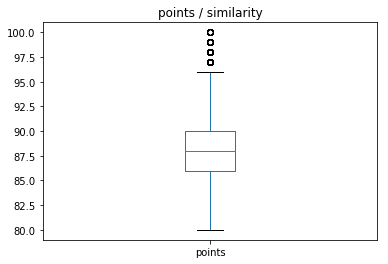

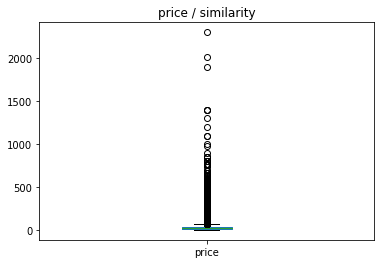

In [28]:
box_plot(df_similarity, "similarity")